# ERP analyses 
In this notebook, we will first perform the analyses on the exploratory dataset (N=40): 
1. read in the preprocessed data and save relevant poolings
2. plot ERPs averaged across participants 
3. plot ERP difference waves (subtract segmented condition)
4. find significant time-windows 

Then, we will look at the validation/confirmatory dataset (N=20):
1. read in the preprocessed data and save relevant poolings 
2. plot ERPs + difference waves
3. save data for repeated measures ANOVA on averaged activity in predefined timewindows 

In [6]:
from tqdm import tqdm
import mne
import numpy as np
import glob
import os
import pickle
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 

## 1.1 Load preprocessed data 

In [7]:
# Load saved epochs
path = r'E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/'
files = glob.glob(path+'*.fif')
print("There are", len(files), "EEG files")
print(files[1][-15:-13])

There are 40 EEG files
02


In [8]:
# selection of electrodes - 2 poolings 
occ=['Oz','O1','O2','Iz','I1','I2','POz']
par=[ 'PO7', 'PO8', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10' ]
pool = ['Oz', 'POz', 'O1', 'O2', 'PO3', 'PO4', 'PO7', 'PO8']


In [ ]:
for pp in tqdm(range(len(files))):
    #ppnr = files[pp][-32:-30]
    ppnr = files[pp][-15:-13]
    print(ppnr)
    epochs = mne.read_epochs(files[pp], verbose=None)
    data = epochs.get_data(picks=pool) # data's shape is 960 x 22 x 615    
    cond_nr = epochs.metadata['cond_nr']
           
    with open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'wb') as f:
         pickle.dump(data,f)
    with open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'wb') as f:
         pickle.dump(cond_nr,f)    
            
    if pp == 0:
        cond_all = cond_nr
        X_all = data
    else:
        cond_all = pd.concat((cond_all, cond_nr))
        cond_all.reset_index(drop=True, inplace=True)
        X_all = np.concatenate((X_all, data), axis=0)
        
with open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD', 'wb') as f:
     pickle.dump(X_all,f)
with open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD', 'wb') as f:
     pickle.dump(cond_all,f)

### Plot averaged ERPS 

In [10]:
# function which plots pool of occipital + pari-occipital channels
def erp_pool(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    erp = np.nanmean(np.nanmean(X_all[cond_all == cond,:,:], axis=0),axis=0)


    return erp

def erp(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    erp = np.nanmean(np.nanmean(X_all[cond_all == cond,:,:], axis=0),axis=0)


    return erp

def sem(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    sem = stats.sem(np.nanmean(X_all[cond_all == cond,:,:], axis=0))

    return sem

import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 16,
        }

fontxs = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 12,
        }


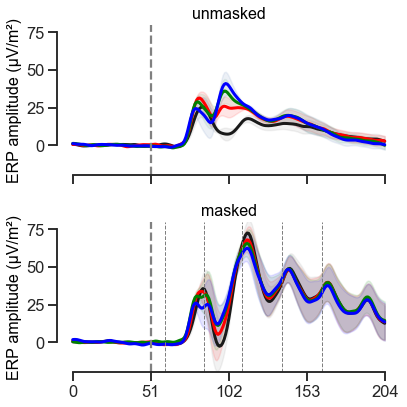

In [11]:
#plt.figure(figsize=(10,6), frameon=False)
import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6), frameon=False)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(1)[:205]*1e6, label='seg',linewidth=3, color='k')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(1)[:205]*1e6+ sem(1)[:205]*1e6, erp(1)[:205]*1e6-sem(1)[:205]*1e6, color='gray', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(2)[:205]*1e6, label='low',linewidth=3, color='red')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(2)[:205]*1e6+ sem(2)[:205]*1e6, erp(2)[:205]*1e6-sem(2)[:205]*1e6, color='red', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(3)[:205]*1e6, label='med',linewidth=3, color='green')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(3)[:205]*1e6+ sem(3)[:205]*1e6, erp(3)[:205]*1e6-sem(3)[:205]*1e6, color='g', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(4)[:205]*1e6, label='high',linewidth=3, color='blue')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(4)[:205]*1e6+ sem(4)[:205]*1e6, erp(4)[:205]*1e6-sem(4)[:205]*1e6, color='b', alpha=0.1)

ax1.set_xticks(np.arange(0,X_all.shape[2],51)[:5])
# ax1.set_xticklabels(('-0.2','0','0.2','0.4', '0.6'),fontdict=font)
# ax1.set_yticks((-10,0,10,20,30,40,50,60,70,80))
# ax1.set_yticklabels(('-10','0','10','20','30','40','50','60','70','80'),fontdict=fontxs)

ax1.set_ylim([-20,80])
ax1.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# ax1.set_frame_on(False)
# ax1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
ax1.axvline(51,color='gray',linestyle='--')
#ax1.axhline(0,color='gray',linestyle='--')
ax1.set_title('unmasked', fontdict=font)

ax2.plot(np.arange(X_all.shape[2])[:205], erp(5)[:205]*1e6, label='seg',linewidth=3, color='k')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(5)[:205]*1e6+ sem(5)[:205]*1e6, erp(5)[:205]*1e6-sem(5)[:205]*1e6, color='gray', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(6)[:205]*1e6, label='low',linewidth=3, color='red')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(6)[:205]*1e6+ sem(6)[:205]*1e6, erp(6)[:205]*1e6-sem(6)[:205]*1e6, color='red', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(7)[:205]*1e6, label='med',linewidth=3, color='green')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(7)[:205]*1e6+ sem(7)[:205]*1e6, erp(7)[:205]*1e6-sem(7)[:205]*1e6, color='green', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(8)[:205]*1e6, label='high',linewidth=3, color='blue')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(8)[:205]*1e6+ sem(8)[:205]*1e6, erp(8)[:205]*1e6-sem(8)[:205]*1e6, color='blue', alpha=0.1)

ax2.set_xticks(np.arange(0,X_all.shape[2],51)[:5])
# ax2.set_xticklabels(('-0.2','-0.1','0','0.1','0.2','0.3','0.4','0.5','0.6'),fontdict=font)
#ax2.set_yticks((-10,0,10,20,30,40,50,60,70,80))
#ax1.set_yticklabels(('-10','0','10','20','30','40','50','60','70','80'),fontdict=fontxs)

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# ax2.set_frame_on(False)
# ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
ax2.axvline(51,color='gray',linestyle='--')
ax2.axvline(60,color='gray',linestyle='--', linewidth = 1) #mask 1
ax2.axvline(86,color='gray',linestyle='--', linewidth = 1) #mask 2
ax2.axvline(111,color='gray',linestyle='--', linewidth = 1) #mask 3
ax2.axvline(137,color='gray',linestyle='--', linewidth = 1) #mask 4
ax2.axvline(163,color='gray',linestyle='--', linewidth = 1) #mask 5
ax2.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
ax2.set_ylim([-20,80])

#ax2.axhline(0,color='gray',linestyle='--')
ax2.set_title('masked', fontdict=font)

fig.tight_layout()

sns.despine(trim=True)
plt.show()
#pp = 'ERPs_exp.pdf'
#fig.savefig(pp, format='pdf')


### Find significant timepoints for each condition

(308, 40)
(308, 40)
[33, 34, 35, 36, 37, 38, 39, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155]
[40, 41, 42, 57, 58, 59, 60, 61, 62, 63, 76, 77, 78, 79, 80, 81, 82, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 223, 224, 225, 226]
[6, 7, 8, 38, 39, 40, 41, 58, 59, 60, 61, 62, 63, 74, 75, 76, 77, 78, 79, 80, 86, 87, 88, 89, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 11

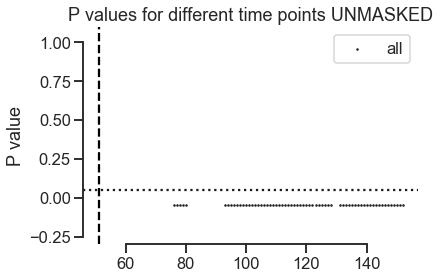

In [12]:
###FIRST UNMASKED 
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    
    erp_low_np.append(pd.DataFrame(erp_low))
    erp_med_np.append(pd.DataFrame(erp_med))
    erp_high_np.append(pd.DataFrame(erp_high))
    
erp_low_np = pd.concat(erp_low_np,axis=1)
erp_low_df = pd.DataFrame(erp_low_np)

erp_med_np = pd.concat(erp_med_np,axis=1)
erp_med_df = pd.DataFrame(erp_med_np)

erp_high_np = pd.concat(erp_high_np,axis=1)
erp_high_df = pd.DataFrame(erp_high_np)

print(erp_low_np.shape)
print(erp_low_df.shape)


threshold = 0.05

import scipy.stats as stats 
t_all_low = []
t_all_med = []
t_all_high = []
for ti in range(erp_low_df.shape[0]):
    #print(ti)
    data_low = erp_low_df.iloc[ti,:]
    t_low, tProb_low = stats.ttest_1samp(data_low, 0)
    t_all_low.append(tProb_low)
    
    data_med = erp_med_df.iloc[ti,:]
    t_med, tProb_med = stats.ttest_1samp(data_med, 0)
    t_all_med.append(tProb_med)
    
    data_high = erp_high_df.iloc[ti,:]
    t_high, tProb_high = stats.ttest_1samp(data_high, 0)
    t_all_high.append(tProb_high)

    
sig_low = [i for i, val in enumerate(t_all_low) if val<threshold]
sig_med = [i for i, val in enumerate(t_all_med) if val<threshold]
sig_high = [i for i, val in enumerate(t_all_high) if val<threshold]

sig = [x for x in sig_low if x in sig_med]
sig_unmasked = [x for x in sig if x in sig_high]


#print(len(sig_high))
#print(82*[-0.2])
#plt.scatter(sig_low,(len(sig_low))*[-0.1], label='low-seg', color='r',s=1)
#plt.scatter(sig_med,(len(sig_med))*[-0.15],label='med-seg',color='g',s=1)
#plt.scatter(sig_high,(len(sig_high))*[-0.2],label='high-seg', color='b',s=1)
plt.scatter(sig_unmasked,(len(sig_unmasked))*[-0.05],label='all', color='k',s=1)

plt.legend()
#plt.xticks(np.arange(0,X_all.shape[2],51), ('-0.2','0','0.2','0.4','0.6','0.8','1.0'))
plt.ylim([-0.3,1.1])
plt.ylabel('P value')
plt.axvline(51,color='black',linestyle='--')
plt.axhline(y=threshold, color='k', linestyle=':')
plt.title('P values for different time points UNMASKED')
sns.despine(trim=True)


print(sig_low)
print(sig_med)
print(sig_high)


(308, 40)
(308, 40)
[0, 52, 53, 54, 76, 77, 78, 79, 80, 81, 82, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 112, 113, 114, 115, 116, 117, 118, 119]
[70, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 112, 113, 114, 115, 116, 117, 118, 119, 129, 130, 131, 244, 245, 246, 247, 248, 249, 250, 251, 266, 267, 304]
[0, 1, 2, 3, 4, 37, 44, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 145, 146, 147, 148, 149, 150, 151, 152, 171, 247, 248, 249]


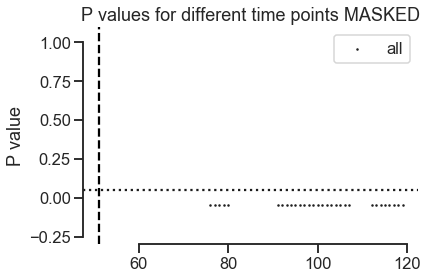

In [13]:
###THEN MASKED
SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,:], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,:], axis=0),axis=0) #22, 308
    
    erp_low_np.append(pd.DataFrame(erp_low))
    erp_med_np.append(pd.DataFrame(erp_med))
    erp_high_np.append(pd.DataFrame(erp_high))
    
erp_low_np = pd.concat(erp_low_np,axis=1)
erp_low_df = pd.DataFrame(erp_low_np)

erp_med_np = pd.concat(erp_med_np,axis=1)
erp_med_df = pd.DataFrame(erp_med_np)

erp_high_np = pd.concat(erp_high_np,axis=1)
erp_high_df = pd.DataFrame(erp_high_np)

print(erp_low_np.shape)
print(erp_low_df.shape)


threshold = 0.05

t_all_low = []
t_all_med = []
t_all_high = []
for ti in range(erp_low_df.shape[0]):
    #print(ti)
    data_low = erp_low_df.iloc[ti,:]
    t_low, tProb_low = stats.ttest_1samp(data_low, 0)
    t_all_low.append(tProb_low)
    
    data_med = erp_med_df.iloc[ti,:]
    t_med, tProb_med = stats.ttest_1samp(data_med, 0)
    t_all_med.append(tProb_med)
    
    data_high = erp_high_df.iloc[ti,:]
    t_high, tProb_high = stats.ttest_1samp(data_high, 0)
    t_all_high.append(tProb_high)

    
sig_low = [i for i, val in enumerate(t_all_low) if val<threshold]
sig_med = [i for i, val in enumerate(t_all_med) if val<threshold]
sig_high = [i for i, val in enumerate(t_all_high) if val<threshold]

sig = [x for x in sig_low if x in sig_med]
sig_masked = [x for x in sig if x in sig_high]


#print(len(sig_high))
#print(82*[-0.2])
#plt.scatter(sig_low,(len(sig_low))*[-0.1], label='low-seg', color='r',s=1)
#plt.scatter(sig_med,(len(sig_med))*[-0.15],label='med-seg',color='g',s=1)
#plt.scatter(sig_high,(len(sig_high))*[-0.2],label='high-seg', color='b',s=1)
plt.scatter(sig_masked,(len(sig_masked))*[-0.05],label='all', color='k',s=1)

plt.legend()
#plt.xticks(np.arange(0,X_all.shape[2],51), ('-0.2','0','0.2','0.4','0.6','0.8','1.0'))
plt.ylim([-0.3,1.1])
plt.ylabel('P value')
plt.axvline(51,color='black',linestyle='--')
plt.axhline(y=threshold, color='k', linestyle=':')
plt.title('P values for different time points MASKED')
sns.despine(trim=True)


print(sig_low)
print(sig_med)
print(sig_high)

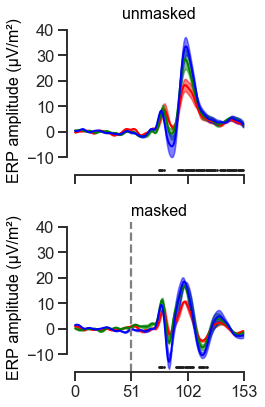

In [15]:
#plt.figure(figsize=(10,6), frameon=False)
import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 16,
        }

fontxs = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 12,
        }

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 6), frameon=False)
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(2)-erp(1))[:153]*1e6, label='low-seg',linewidth=2, color='red')
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(3)-erp(1))[:153]*1e6, label='med-seg',linewidth=2, color='green')
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(4)-erp(1))[:153]*1e6, label='high-seg',linewidth=2, color='blue')

ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(2)-erp(1))[:153]*1e6+(sem(2)-sem(1))[:153]*1e6, (erp(2)-erp(1))[:153]*1e6-(sem(2)-sem(1))[:153]*1e6, color='red', alpha=0.5)
ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(3)-erp(1))[:153]*1e6+(sem(3)-sem(1))[:153]*1e6, (erp(3)-erp(1))[:153]*1e6-(sem(3)-sem(1))[:153]*1e6, color='green', alpha=0.5)
ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(4)-erp(1))[:153]*1e6+(sem(4)-sem(1))[:153]*1e6, (erp(4)-erp(1))[:153]*1e6-(sem(4)-sem(1))[:153]*1e6, color='blue', alpha=0.5)


#ax1.legend()
ax1.set_ylim([-17,42])
ax1.set_ylabel('ERP amplitude (μV/m²)',fontdict=font)
#ax1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#ax1.axvline(51,color='k',linestyle='--')

#ax1.set_frame_on(False)
# ax1.fill_between([75,81],-17,42, color='gray', alpha=0.3)
# ax1.fill_between([82,90],-17,42,color='lightblue',  alpha=0.3)
# ax1.fill_between([91,107],-17,42,color='gray', alpha=0.3)
# ax1.fill_between([108,122],-17,42,color='lightblue', alpha=0.3)
# ax1.fill_between([123,140],-17,42,color='gray', alpha=0.3)
#ax1.axhline(0,color='k',linestyle='-')
ax1.set_title('unmasked', fontdict=font)
ax1.set_yticks((-10,0,10,20,30,40))
#ax1.set_yticklabels(('-10','0','10','20','30','40'),fontdict=fontxs)

ax1.scatter(sig_unmasked,(len(sig_unmasked))*[-15],label='all', color='k',s=1.5)

ax2.plot(np.arange(X_all.shape[2])[:153], (erp(6)-erp(5))[:153]*1e6, label='low-seg',linewidth=2, color='red')
ax2.plot(np.arange(X_all.shape[2])[:153], (erp(7)-erp(5))[:153]*1e6, label='med-seg',linewidth=2, color='green')
ax2.plot(np.arange(X_all.shape[2])[:153], (erp(8)-erp(5))[:153]*1e6, label='high-seg',linewidth=2,color='blue')

ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(6)-erp(5))[:153]*1e6+(sem(6)-sem(5))[:153]*1e6, (erp(6)-erp(5))[:153]*1e6-(sem(6)-sem(5))[:153]*1e6, color='red', alpha=0.5)
ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(7)-erp(5))[:153]*1e6+(sem(7)-sem(5))[:153]*1e6, (erp(7)-erp(5))[:153]*1e6-(sem(7)-sem(5))[:153]*1e6, color='green', alpha=0.5)
ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(8)-erp(5))[:153]*1e6+(sem(8)-sem(5))[:153]*1e6, (erp(8)-erp(5))[:153]*1e6-(sem(8)-sem(5))[:153]*1e6, color='blue', alpha=0.5)

#ax2.legend()
ax2.set_xticks(np.arange(0,X_all.shape[2],51)[:153])
#ax2.set_xticklabels(('-0.2','0','0.2','0.4'),fontdict=font)
ax2.set_yticks((-10,0,10,20,30,40))
#ax2.set_yticklabels(('-10','0','10','20','30','40'),fontdict=fontxs)

ax2.set_ylim([-17,42])
ax2.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#ax2.set_frame_on(False)
#ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
ax2.axvline(51,color='gray',linestyle='--')
# ax2.fill_between([75,81],-16,42, color='gray', alpha=0.3)
# ax2.fill_between([82,90],-16,42,color='lightblue', alpha=0.3)
# ax2.fill_between([91,107],-16,42,color='gray', alpha=0.3)
# ax2.fill_between([108,122],-16,42,color='lightblue', alpha=0.3)
# ax2.fill_between([123,140],-16,42,color='gray', alpha=0.3)
#ax2.axhline(0,color='k',linestyle='-')
ax2.scatter(sig_masked,(len(sig_masked))*[-15],label='all', color='k',s=1.5)

ax2.set_title('masked', fontdict=font)
fig.tight_layout()

sns.despine(trim=True)

# pp = ('ERP_Exploratory.eps')
# plt.savefig(pp, format='eps')

plt.show()



## Build all dataframes (5 timepoints, 1 pooling)

In [14]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/data_t1_75_81_pool_elec.csv')

In [15]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/data_t2_82_90_pool_elec.csv')

In [16]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/data_t3_91_107_pool_elec.csv')

In [17]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/data_t4_108_122_pool_elec.csv')

In [18]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/40/EEG_01hp_ICA2_CSD/data_t5_123_140_pool_elec.csv')

# Repeat for validation set

In [50]:
# Load saved epochs
path = r'E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/'
files = glob.glob(path+'*.fif')
print("There are", len(files), "EEG files")
print(files[1][-15:-13])

There are 20 EEG files
02


In [51]:
for pp in tqdm(range(len(files))):
    #ppnr = files[pp][-32:-30]
    ppnr = files[pp][-15:-13]
    print(ppnr)
    if ppnr == "01" :#or ppnr == "03":
        continue
    
    epochs = mne.read_epochs(files[pp], verbose=None)
    data = epochs.get_data(picks=pool) # data's shape is 960 x 22 x 615    
    cond_nr = epochs.metadata['cond_nr']
           
    with open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'wb') as f:
        pickle.dump(data,f)
    with open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'wb') as f:
        pickle.dump(cond_nr,f)    
            
    if pp == 0:
        cond_all = cond_nr
        X_all = data
    else:
        cond_all = pd.concat((cond_all, cond_nr))
        cond_all.reset_index(drop=True, inplace=True)
        X_all = np.concatenate((X_all, data), axis=0)
        
with open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD', 'wb') as f:
     pickle.dump(X_all,f)
with open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD', 'wb') as f:
     pickle.dump(cond_all,f)

  0%|                                                   | 0/20 [00:00<?, ?it/s]

01
02
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_02_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 10%|████▎                                      | 2/20 [00:00<00:05,  3.05it/s]

03
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_03_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 15%|██████▍                                    | 3/20 [00:01<00:07,  2.30it/s]

04
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_04_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 20%|████████▌                                  | 4/20 [00:02<00:08,  1.90it/s]

05
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_05_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 25%|██████████▊                                | 5/20 [00:02<00:08,  1.79it/s]

06
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_06_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 30%|████████████▉                              | 6/20 [00:03<00:08,  1.71it/s]

07
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_07_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 35%|███████████████                            | 7/20 [00:04<00:08,  1.61it/s]

08
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_08_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 40%|█████████████████▏                         | 8/20 [00:04<00:07,  1.57it/s]

09
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_09_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 45%|███████████████████▎                       | 9/20 [00:05<00:07,  1.54it/s]

10
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_10_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 50%|█████████████████████                     | 10/20 [00:06<00:06,  1.50it/s]

11
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_11_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 55%|███████████████████████                   | 11/20 [00:06<00:05,  1.51it/s]

12
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_12_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 60%|█████████████████████████▏                | 12/20 [00:07<00:05,  1.51it/s]

13
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_13_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 65%|███████████████████████████▎              | 13/20 [00:08<00:04,  1.46it/s]

14
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_14_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 70%|█████████████████████████████▍            | 14/20 [00:08<00:04,  1.39it/s]

15
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_15_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 75%|███████████████████████████████▌          | 15/20 [00:09<00:03,  1.33it/s]

16
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_16_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 80%|█████████████████████████████████▌        | 16/20 [00:10<00:03,  1.27it/s]

17
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_17_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 85%|███████████████████████████████████▋      | 17/20 [00:11<00:02,  1.29it/s]

18
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_18_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 90%|█████████████████████████████████████▊    | 18/20 [00:12<00:01,  1.31it/s]

19
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_19_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


 95%|███████████████████████████████████████▉  | 19/20 [00:12<00:00,  1.30it/s]

20
Reading E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD\pp_20_0423-epo.fif ...
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms
        0 CTF compensation matrices available
912 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 8 columns
0 projection items activated


100%|██████████████████████████████████████████| 20/20 [00:13<00:00,  1.45it/s]


In [52]:
# function which plots pool of occipital + pari-occipital channels
def erp_pool(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    erp = np.nanmean(np.nanmean(X_all[cond_all == cond,:,:], axis=0),axis=0)


    return erp

def erp(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    erp = np.nanmean(np.nanmean(X_all[cond_all == cond,:,:], axis=0),axis=0)


    return erp

def sem(cond):  
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD', 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD', 'rb')
    cond_all = pickle.load(f)
    
    sem = stats.sem(np.nanmean(X_all[cond_all == cond,:,:], axis=0))

    return sem

import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 16,
        }

fontxs = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 12,
        }


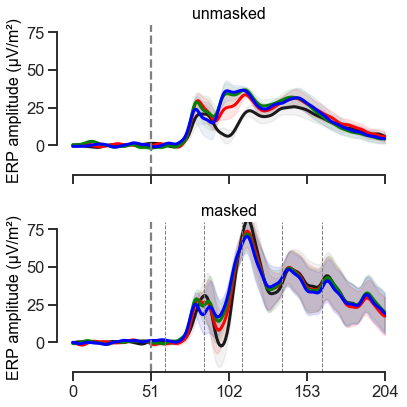

In [53]:
#plt.figure(figsize=(10,6), frameon=False)
import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6), frameon=False)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(1)[:205]*1e6, label='seg',linewidth=3, color='k')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(1)[:205]*1e6+ sem(1)[:205]*1e6, erp(1)[:205]*1e6-sem(1)[:205]*1e6, color='gray', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(2)[:205]*1e6, label='low',linewidth=3, color='red')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(2)[:205]*1e6+ sem(2)[:205]*1e6, erp(2)[:205]*1e6-sem(2)[:205]*1e6, color='red', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(3)[:205]*1e6, label='med',linewidth=3, color='green')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(3)[:205]*1e6+ sem(3)[:205]*1e6, erp(3)[:205]*1e6-sem(3)[:205]*1e6, color='g', alpha=0.1)
ax1.plot(np.arange(X_all.shape[2])[:205], erp(4)[:205]*1e6, label='high',linewidth=3, color='blue')
ax1.fill_between(np.arange(X_all.shape[2])[:205], erp(4)[:205]*1e6+ sem(4)[:205]*1e6, erp(4)[:205]*1e6-sem(4)[:205]*1e6, color='b', alpha=0.1)

ax1.set_xticks(np.arange(0,X_all.shape[2],51)[:5])
# ax1.set_xticklabels(('-0.2','0','0.2','0.4', '0.6'),fontdict=font)
# ax1.set_yticks((-10,0,10,20,30,40,50,60,70,80))
# ax1.set_yticklabels(('-10','0','10','20','30','40','50','60','70','80'),fontdict=fontxs)

ax1.set_ylim([-20,80])
ax1.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# ax1.set_frame_on(False)
# ax1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
ax1.axvline(51,color='gray',linestyle='--')
#ax1.axhline(0,color='gray',linestyle='--')
ax1.set_title('unmasked', fontdict=font)

ax2.plot(np.arange(X_all.shape[2])[:205], erp(5)[:205]*1e6, label='seg',linewidth=3, color='k')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(5)[:205]*1e6+ sem(5)[:205]*1e6, erp(5)[:205]*1e6-sem(5)[:205]*1e6, color='gray', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(6)[:205]*1e6, label='low',linewidth=3, color='red')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(6)[:205]*1e6+ sem(6)[:205]*1e6, erp(6)[:205]*1e6-sem(6)[:205]*1e6, color='red', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(7)[:205]*1e6, label='med',linewidth=3, color='green')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(7)[:205]*1e6+ sem(7)[:205]*1e6, erp(7)[:205]*1e6-sem(7)[:205]*1e6, color='green', alpha=0.1)
ax2.plot(np.arange(X_all.shape[2])[:205], erp(8)[:205]*1e6, label='high',linewidth=3, color='blue')
ax2.fill_between(np.arange(X_all.shape[2])[:205], erp(8)[:205]*1e6+ sem(8)[:205]*1e6, erp(8)[:205]*1e6-sem(8)[:205]*1e6, color='blue', alpha=0.1)

ax2.set_xticks(np.arange(0,X_all.shape[2],51)[:5])
# ax2.set_xticklabels(('-0.2','-0.1','0','0.1','0.2','0.3','0.4','0.5','0.6'),fontdict=font)
#ax2.set_yticks((-10,0,10,20,30,40,50,60,70,80))
#ax1.set_yticklabels(('-10','0','10','20','30','40','50','60','70','80'),fontdict=fontxs)

# for spine in plt.gca().spines.values():
#     spine.set_visible(False)
# ax2.set_frame_on(False)
# ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
ax2.axvline(51,color='gray',linestyle='--')
ax2.axvline(60,color='gray',linestyle='--', linewidth = 1) #mask 1
ax2.axvline(86,color='gray',linestyle='--', linewidth = 1) #mask 2
ax2.axvline(111,color='gray',linestyle='--', linewidth = 1) #mask 3
ax2.axvline(137,color='gray',linestyle='--', linewidth = 1) #mask 4
ax2.axvline(163,color='gray',linestyle='--', linewidth = 1) #mask 5
ax2.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
ax2.set_ylim([-20,80])

#ax2.axhline(0,color='gray',linestyle='--')
ax2.set_title('masked', fontdict=font)

fig.tight_layout()

sns.despine(trim=True)
plt.show()
#pp = 'ERPs_conf.pdf'
#fig.savefig(pp, format='pdf')


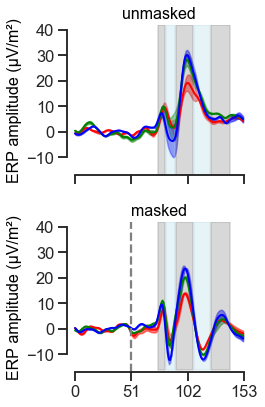

In [54]:
#plt.figure(figsize=(10,6), frameon=False)
import seaborn as sns
sns.set(style="ticks")
sns.set_context('talk')


font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 16,
        }

fontxs = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'light',
        'size': 12,
        }

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(4, 6), frameon=False)
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(2)-erp(1))[:153]*1e6, label='low-seg',linewidth=2, color='red')
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(3)-erp(1))[:153]*1e6, label='med-seg',linewidth=2, color='green')
ax1.plot(np.arange(X_all.shape[2])[:153], (erp(4)-erp(1))[:153]*1e6, label='high-seg',linewidth=2, color='blue')

ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(2)-erp(1))[:153]*1e6+(sem(2)-sem(1))[:153]*1e6, (erp(2)-erp(1))[:153]*1e6-(sem(2)-sem(1))[:153]*1e6, color='red', alpha=0.5)
ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(3)-erp(1))[:153]*1e6+(sem(3)-sem(1))[:153]*1e6, (erp(3)-erp(1))[:153]*1e6-(sem(3)-sem(1))[:153]*1e6, color='green', alpha=0.5)
ax1.fill_between(np.arange(X_all.shape[2])[:153], (erp(4)-erp(1))[:153]*1e6+(sem(4)-sem(1))[:153]*1e6, (erp(4)-erp(1))[:153]*1e6-(sem(4)-sem(1))[:153]*1e6, color='blue', alpha=0.5)


#ax1.legend()
ax1.set_ylim([-17,42])
ax1.set_ylabel('ERP amplitude (μV/m²)',fontdict=font)
#ax1.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=False)
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#ax1.axvline(51,color='k',linestyle='--')

#ax1.set_frame_on(False)
ax1.fill_between([75,81],-17,42, color='gray', alpha=0.3)
ax1.fill_between([82,90],-17,42,color='lightblue',  alpha=0.3)
ax1.fill_between([91,107],-17,42,color='gray', alpha=0.3)
ax1.fill_between([108,122],-17,42,color='lightblue', alpha=0.3)
ax1.fill_between([123,140],-17,42,color='gray', alpha=0.3)
#ax1.axhline(0,color='k',linestyle='-')
ax1.set_title('unmasked', fontdict=font)
ax1.set_yticks((-10,0,10,20,30,40))
#ax1.set_yticklabels(('-10','0','10','20','30','40'),fontdict=fontxs)

ax2.plot(np.arange(X_all.shape[2])[:153], (erp(6)-erp(5))[:153]*1e6, label='low-seg',linewidth=2, color='red')
ax2.plot(np.arange(X_all.shape[2])[:153], (erp(7)-erp(5))[:153]*1e6, label='med-seg',linewidth=2, color='green')
ax2.plot(np.arange(X_all.shape[2])[:153], (erp(8)-erp(5))[:153]*1e6, label='high-seg',linewidth=2,color='blue')

ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(6)-erp(5))[:153]*1e6+(sem(6)-sem(5))[:153]*1e6, (erp(6)-erp(5))[:153]*1e6-(sem(6)-sem(5))[:153]*1e6, color='red', alpha=0.5)
ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(7)-erp(5))[:153]*1e6+(sem(7)-sem(5))[:153]*1e6, (erp(7)-erp(5))[:153]*1e6-(sem(7)-sem(5))[:153]*1e6, color='green', alpha=0.5)
ax2.fill_between(np.arange(X_all.shape[2])[:153], (erp(8)-erp(5))[:153]*1e6+(sem(8)-sem(5))[:153]*1e6, (erp(8)-erp(5))[:153]*1e6-(sem(8)-sem(5))[:153]*1e6, color='blue', alpha=0.5)

#ax2.legend()
ax2.set_xticks(np.arange(0,X_all.shape[2],51)[:153])
#ax2.set_xticklabels(('-0.2','0','0.2','0.4'),fontdict=font)
ax2.set_yticks((-10,0,10,20,30,40))
#ax2.set_yticklabels(('-10','0','10','20','30','40'),fontdict=fontxs)

ax2.set_ylim([-17,42])
ax2.set_ylabel('ERP amplitude (μV/m²)', fontdict=font)
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)
#ax2.set_frame_on(False)
#ax2.tick_params(top=False, bottom=False, left=False, right=False, labelleft=True, labelbottom=True)
ax2.axvline(51,color='gray',linestyle='--')
ax2.fill_between([75,81],-16,42, color='gray', alpha=0.3)
ax2.fill_between([82,90],-16,42,color='lightblue', alpha=0.3)
ax2.fill_between([91,107],-16,42,color='gray', alpha=0.3)
ax2.fill_between([108,122],-16,42,color='lightblue', alpha=0.3)
ax2.fill_between([123,140],-16,42,color='gray', alpha=0.3)
#ax2.axhline(0,color='k',linestyle='-')
ax2.set_title('masked', fontdict=font)
fig.tight_layout()

sns.despine(trim=True)

# pp = ('ERP_Confirmatory.eps')
# plt.savefig(pp, format='eps')

plt.show()



In [47]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    if ppnr == "01" :#or ppnr == "03":
        continue
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    if ppnr == "01":# or ppnr == "03":
        continue
    #print(ppnr)
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,75:81], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,75:81], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t1_75_81_pool_elec.csv')

In [46]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,82:90], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,82:90], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t2_82_90_pool_elec.csv')

In [45]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,91:107], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,91:107], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t3_91_107_pool_elec.csv')

In [44]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,108:122], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,108:122], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t4_108_122_pool_elec.csv')

In [43]:
#BUILD DATAFRAME FOR REPEATED MEASURES ANOVAabs
SEG = 1
LOW = 2
MED = 3
HIGH = 4

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_unmasked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_unmasked.columns = ['subj_idx','c1',  'c2', 'c3']
df_unmasked['masking']=0

#print(df_unmasked)

SEG = 5
LOW = 6
MED = 7
HIGH = 8

erp_low_np = [] 
erp_med_np = []
erp_high_np = []
ppnr_np = []
for pp in range(len(files)):
    ppnr = files[pp][-15:-13]
    #print(ppnr)
    if ppnr == "01":# or ppnr == "03":
        continue
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_CSD_' +ppnr, 'rb')
    X_all = pickle.load(f)
    
    f=open('E:/Projects/2020_recurrentprocessing/Data/extra20/EEG_01hp_ICA2_LT_CSD/pool_elec_activity_labels_CSD_'+ppnr, 'rb')
    cond_all = pickle.load(f)
    
    erp_low = np.nanmean(np.nanmean(X_all[cond_all == LOW,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_med = np.nanmean(np.nanmean(X_all[cond_all == MED,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    erp_high= np.nanmean(np.nanmean(X_all[cond_all == HIGH,:,123:140], axis=0),axis=0) -np.nanmean(np.nanmean(X_all[cond_all == SEG,:,123:140], axis=0),axis=0) #22, 308
    
    #print(erp_low.mean())
    erp_low_np.append([ppnr,erp_low.mean()])
    erp_med_np.append(erp_med.mean())
    erp_high_np.append(erp_high.mean())
    
    ppnr_np.append(ppnr)
    
    
erp_low_df = pd.DataFrame(erp_low_np)
erp_med_df = pd.DataFrame(erp_med_np)
erp_high_df = pd.DataFrame(erp_high_np)
ppnr_df = pd.DataFrame(ppnr_np)

df_masked = pd.concat([erp_low_df,erp_med_df,erp_high_df], axis=1)
df_masked.columns = ['subj_idx','c1',  'c2', 'c3']
df_masked['masking']=1

df_t1 = pd.concat([df_unmasked, df_masked])

l=pd.wide_to_long(df_t1, stubnames='c', i=['subj_idx', 'masking'], j='condition')
l.to_csv('E:/Projects/2020_recurrentprocessing/Data/extra20/data_t5_123_140_pool_elec.csv')